In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re
# Basic EDA, cleaning, and visualization modules

from bs4 import BeautifulSoup
from IPython.core.display import display, HTML
import requests
# Webscraping 

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as stats
# Modeling



In [41]:
imdb_data= pd.read_csv("https://imdbdatasetuoft.s3.us-east-2.amazonaws.com/IMDb_data.csv")

imdb_df = pd.read_csv("https://imdbdatasetuoft.s3.us-east-2.amazonaws.com/Encoded_Data.csv")

imdb_df.head()

,duration,country,language 1,weighted_average_rating,total_votes,tot_voters_below_18,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters,Drama,Adventure,Biography,Crime,Fantasy,Comedy,Horror,Family,Action,Romance,Mystery,History,Sci-Fi,Animation,Thriller,Sport
0,100,148,38,5,446,23,23,111,193,299,39,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,68,66,68,7,2237,0,402,895,482,1607,215,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,60,148,38,6,484,35,35,177,168,354,31,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,85,47,49,7,753,0,59,287,276,530,93,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,120,66,68,6,273,0,34,99,69,191,21,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


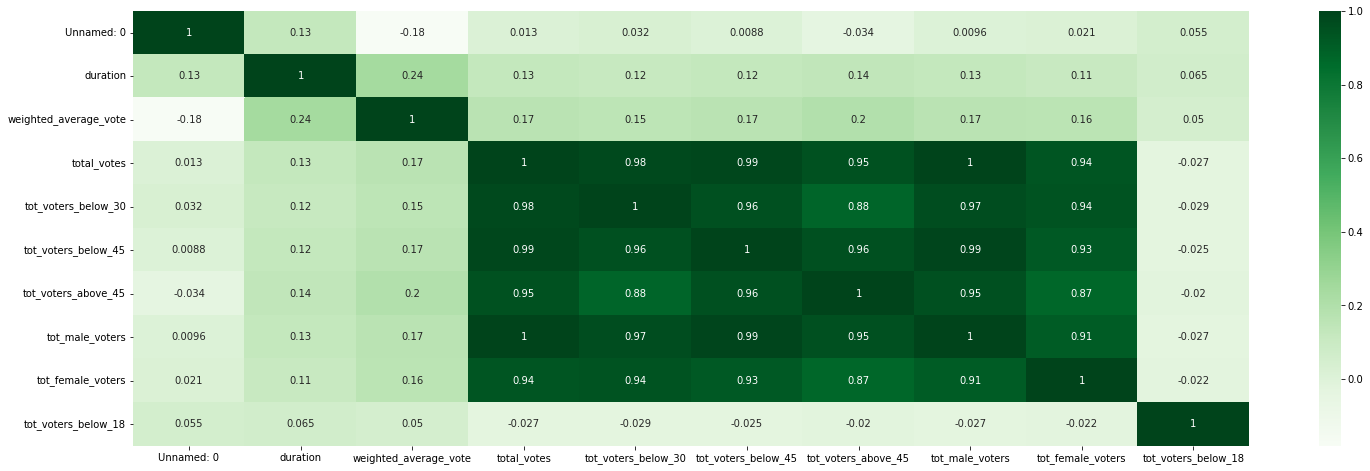

In [42]:
corr = imdb_data.corr()
import seaborn as sns
plt.figure(figsize=(25,8))
sns.heatmap(corr, cmap="Greens",annot=True)

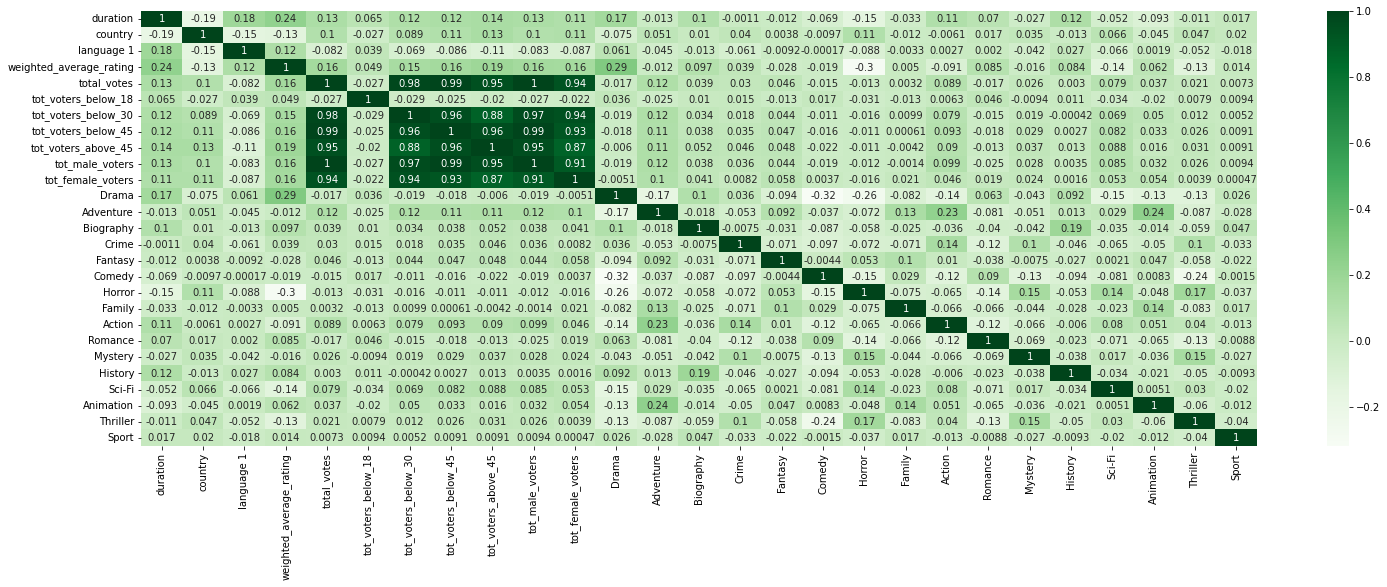

In [6]:
corr = imdb_df.corr()
import seaborn as sns
plt.figure(figsize=(25,8))
sns.heatmap(corr, cmap="Greens",annot=True)

In [7]:
X = imdb_df.copy()
X = X.drop("weighted_average_rating", axis=1)
X.head()



,duration,country,language 1,total_votes,tot_voters_below_18,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters,Drama,Adventure,Biography,Crime,Fantasy,Comedy,Horror,Family,Action,Romance,Mystery,History,Sci-Fi,Animation,Thriller,Sport
0,100,148,38,446,23,23,111,193,299,39,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,68,66,68,2237,0,402,895,482,1607,215,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,60,148,38,484,35,35,177,168,354,31,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,85,47,49,753,0,59,287,276,530,93,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,120,66,68,273,0,34,99,69,191,21,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [8]:
y = imdb_df["weighted_average_rating"].ravel()
y[:5]

array([5, 7, 6, 7, 6])

In [9]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [10]:
# Creating a StandardScaler instance.
from sklearn.preprocessing import StandardScaler,OneHotEncoder

scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [27]:
# Create a random forest regressor.
from sklearn.ensemble import RandomForestRegressor
rf_model= RandomForestRegressor(n_estimators=50, random_state=1)
rf_model1= RandomForestRegressor(n_estimators=100, random_state=1)
rf_model3= RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=1)
rf_model4= RandomForestRegressor(n_estimators=800, min_samples_split=20, random_state=1)

In [30]:
rf_model = rf_model.fit(X_train_scaled, y_train)
rf_model1 = rf_model1.fit(X_train_scaled, y_train)
rf_model3 = rf_model3.fit(X_train_scaled, y_train)



In [28]:
rf_model4 = rf_model4.fit(X_train_scaled, y_train)


In [31]:
# Making predictions using the testing data.
prediction1 = rf_model.predict(X_test_scaled)
prediction2 = rf_model1.predict(X_test_scaled)
prediction3 = rf_model3.predict(X_test_scaled)
prediction4 = rf_model4.predict(X_test_scaled)

In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
estimators = np.arange(200, 800, 100)
scores = []
for n in estimators:
    rf_model.set_params(n_estimators=n)
    rf_model.fit(X_train, y_train)
    print
    scores.append(rf_model.score(X_test, y_test))
scores    

[0.49415757514316994,
 0.4947008957127814,
 0.4958920277984976,
 0.4960607807872609,
 0.4961116558077189,
 0.4958916103852188]

In [15]:
errors = abs(prediction1 - y_test)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 86.39 %.


In [18]:
feature_importances = rf_model.feature_importances_


Feature: 0, Score: 0.08210
Feature: 1, Score: 0.04933
Feature: 2, Score: 0.07977
Feature: 3, Score: 0.10713
Feature: 4, Score: 0.03599
Feature: 5, Score: 0.07168
Feature: 6, Score: 0.07799
Feature: 7, Score: 0.13154
Feature: 8, Score: 0.06626
Feature: 9, Score: 0.07275
Feature: 10, Score: 0.06348
Feature: 11, Score: 0.00548
Feature: 12, Score: 0.00206
Feature: 13, Score: 0.00575
Feature: 14, Score: 0.00495
Feature: 15, Score: 0.00935
Feature: 16, Score: 0.07198
Feature: 17, Score: 0.00362
Feature: 18, Score: 0.01848
Feature: 19, Score: 0.00654
Feature: 20, Score: 0.00392
Feature: 21, Score: 0.00219
Feature: 22, Score: 0.01123
Feature: 23, Score: 0.00521
Feature: 24, Score: 0.00980
Feature: 25, Score: 0.00144


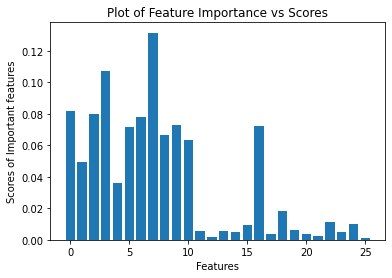

In [19]:
from matplotlib import pyplot

for i,v in enumerate(feature_importances):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(feature_importances))], feature_importances)
pyplot.xlabel('Features')
pyplot.ylabel('Scores of Important features')
plt.title('Plot of Feature Importance vs Scores')
pyplot.show()